<a href="https://colab.research.google.com/github/Gscoder27/my-first-repo/blob/main/Laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Advance visualisation library similar to matplotlib but adv version

In [ ]:
# Uni# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 131543: invalid continuation byte
df=pd.read_csv("/content/drive/MyDrive/Rinex training/laptop_price (1).csv" , encoding= "latin")
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df.drop(columns=['laptop_ID'], inplace=True)

In [ ]:
df.sample()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
784,Lenovo,ThinkPad T470s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.7kg,2299.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [ ]:
df.isnull().sum()  #Will go ahed and find any missing values

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
df.duplicated().sum()  # TO find the number of duplicated values

28

In [ ]:
df[df.duplicated()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1275,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,729.00
1276,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,459.00
1277,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,289.00
1278,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,379.00
1279,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.00
1280,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,549.99
1281,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99
1282,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.00
1283,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
1284,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00


In [ ]:
df.drop_duplicates(inplace=True)  #To drop the duplicated data

In [ ]:
df.shape

(1275, 12)

In [ ]:
df.sample()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
888,Acer,Chromebook C731-C78G,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,297.0


In [ ]:
df['Price_euros']*90.96   #To convert the output column from euros to inr

0       121858.2024
1        81767.5824
2        52302.0000
3       230806.4520
4       164055.4560
           ...     
1270     58032.4800
1271    136349.0400
1272     20829.8400
1273     69493.4400
1274     33564.2400
Name: Price_euros, Length: 1275, dtype: float64

In [ ]:
df['Price_INR']=(df['Price_euros']*90.96).astype('int')
df.drop(columns=['Price_euros'], inplace=True)  #To permanently delete the Price_euros

In [ ]:
df.sample()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_INR
530,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,274041


In [ ]:
# EDA
# - Univariate Analysis
# - Multi-Variate Analysis

In [ ]:
#Company Column
df['Company'].value_counts()  #No. of Laptops per company

Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [ ]:
# From samsung to Huawei there are very few laptops to better dropping it
9+7+7+6+4+4+3+3+3+3+2

51

In [ ]:
plt.rcParams['figure.figsize']=[6,3]  # To rezise the graph
# The default setting for entire notebook
# plt.figure(figsize=(10,8)) # individual graphs

<Axes: >

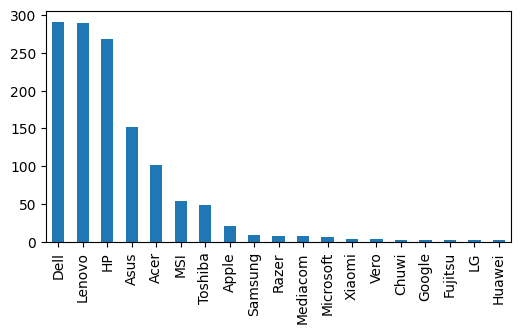

In [ ]:
df['Company'].value_counts().plot(kind="bar")

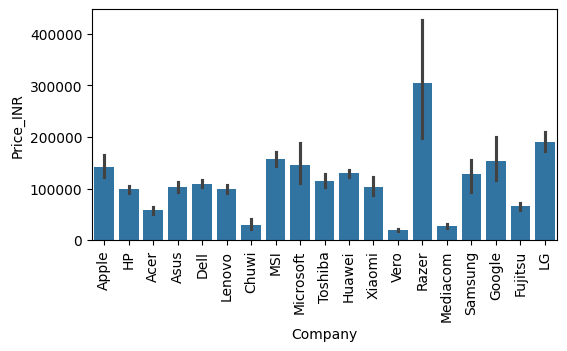

In [ ]:
sns.barplot(x=df['Company'],y=df['Price_INR'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df[df.groupby('Company').Company.transform('count')>10]  #Will count the companies who have laptops greater than 10 act data set

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_INR
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,121858
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,81767
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,52302
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,230806
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,164055
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,58032
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,136349
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,20829
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,69493


In [ ]:
df=df[df.groupby('Company').Company.transform('count')>10] .copy() #Will count the companies who have laptops greater than 10 act data set

In [ ]:
df.shape

(1224, 12)

In [ ]:
df.reset_index(drop=True)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_INR
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,121858
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,81767
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,52302
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,230806
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,164055
...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,58032
1220,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,136349
1221,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,20829
1222,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,69493


In [ ]:
df=df.reset_index(drop=True)

<Axes: >

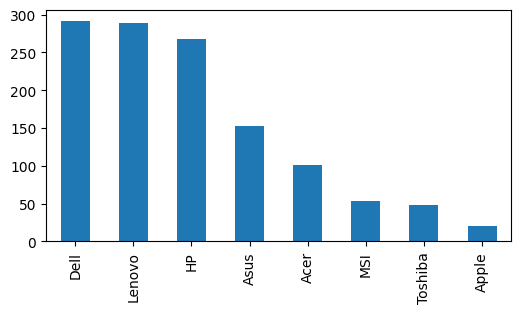

In [ ]:
df['Company'].value_counts().plot(kind="bar")

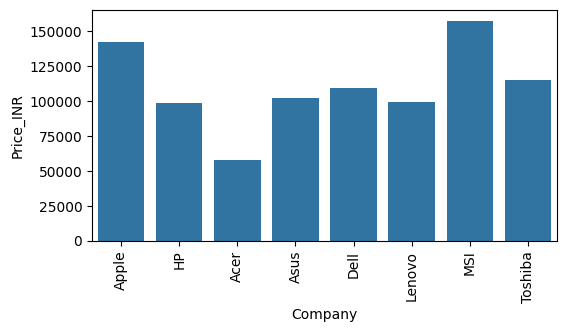

In [ ]:
sns.barplot(x=df['Company'],y=df['Price_INR'], errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Product'].value_counts()

XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Legion Y520-15IKBN                     19
Vostro 3568                            19
                                       ..
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
Portege X30-D-10L                       1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: Product, Length: 589, dtype: int64

In [ ]:
df.drop(columns=['Product'],inplace=True)  #There are variety of product by there model name so considered droping it

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_INR
437,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16GB,256GB SSD,Nvidia Quadro M620,Windows 10,2.17kg,179646


In [ ]:
df['TypeName'].value_counts()

Notebook              688
Gaming                200
Ultrabook             171
2 in 1 Convertible    114
Workstation            29
Netbook                22
Name: TypeName, dtype: int64

<Axes: >

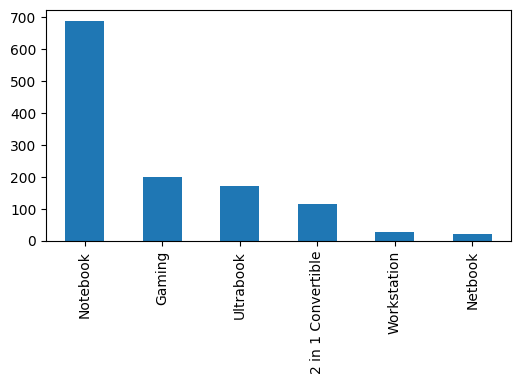

In [ ]:
df['TypeName'].value_counts().plot(kind="bar")

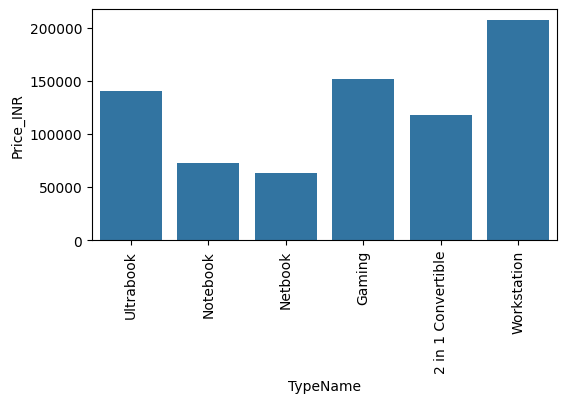

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price_INR'], errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Inches'].value_counts()

15.6    637
14.0    182
17.3    162
13.3    152
12.5     37
11.6     29
12.0      6
13.9      6
15.4      4
10.1      4
18.4      1
17.0      1
14.1      1
11.3      1
15.0      1
Name: Inches, dtype: int64

In [ ]:
# 15.6 : 15 inch
# 14.0 : 14 inch
# 17.3 : 17 inch
# 13.3 : 13 inch

<Axes: >

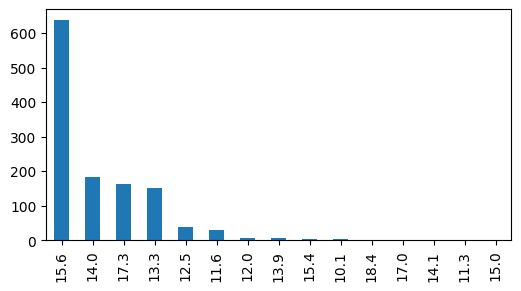

In [ ]:
df['Inches'].value_counts().plot(kind="bar")

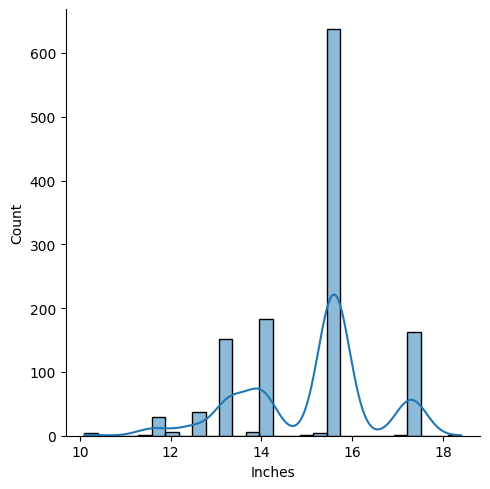

In [ ]:
sns.displot(x=df['Inches'], kde=True)

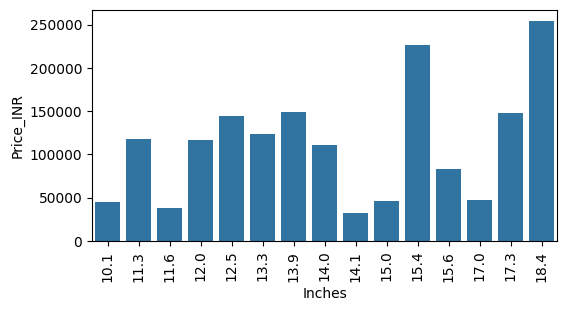

In [ ]:
sns.barplot(x=df['Inches'],y=df['Price_INR'], errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Screen resokution cleaning

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                492
1366x768                                         258
IPS Panel Full HD 1920x1080                      217
IPS Panel Full HD / Touchscreen 1920x1080         48
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
4K Ultra HD / Touchscreen 3840x2160                8
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Touchscreen 1920x1200                    4
1440x900                                      

In [ ]:
# Target i.e. what resolution is requires to consider while predicting
# X_res  : horizontal pixels
# Y_res  : vertical pixels
# IPS    : IPS panel or not
# Touchscreen : Touchscreen or not

In [ ]:
a="IPS Panel Full HD / Touchscreen 1920x1080"

In [ ]:
a.split()

['IPS', 'Panel', 'Full', 'HD', '/', 'Touchscreen', '1920x1080']

In [ ]:
a.split()[-1]

'1920x1080'

In [ ]:
a.split()[-1].split('x')

['1920', '1080']

In [ ]:
a.split()[-1].split('x')[0]

'1920'

In [ ]:
a.split()[-1].split('x')[1]

'1080'

In [ ]:
(lambda x:x.split()[-1].split('x')[0])("IPS Panel Full HD / Touchscreen 1920x1080")

'1920'

In [ ]:
(lambda x:x.split()[-1].split('x')[1])("IPS Panel Full HD / Touchscreen 1920x1080") #pandas

'1080'

In [ ]:
(lambda x:1 if "IPS" in x else 0)("VA Panel Full HD / 1920x1080")
# Will go and check for respective keywords under if statement

0

In [ ]:
df['ScreenResolution'].apply(lambda x:x.split()[-1].split('x')[0])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1219    1920
1220    3200
1221    1366
1222    1366
1223    1366
Name: ScreenResolution, Length: 1224, dtype: object

In [ ]:
df['ScreenResolution'].apply(lambda x:x.split()[-1].split('x')[1])

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1219    1080
1220    1800
1221     768
1222     768
1223     768
Name: ScreenResolution, Length: 1224, dtype: object

In [ ]:
# Now to shorten the screenresolution column
df['X_res']=df['ScreenResolution'].apply(lambda x:x.split()[-1].split('x')[0]).astype('int')
df['Y_res']=df['ScreenResolution'].apply(lambda x:x.split()[-1].split('x')[1]).astype('int')
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0).astype('int')
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if "IPS" in x else 0).astype('int')

In [ ]:
df.sample(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_INR,X_res,Y_res,Touchscreen,IPS
106,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,134620,1920,1080,0,1
41,Asus,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Nvidia GeForce 940MX,Linux,2.3kg,47571,1366,768,0,0
1136,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.591kg,82682,1920,1080,0,1
1005,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.3kg,99510,1920,1080,1,1
1022,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8GB,256GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.920kg,118247,2304,1440,0,1
325,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,90869,1920,1080,0,0


In [ ]:
# Now dropping the screenresolution column
df.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_INR,X_res,Y_res,Touchscreen,IPS
212,Lenovo,2 in 1 Convertible,14.0,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.74kg,81773,1920,1080,0,1


In [ ]:
df['Ram'].value_counts()

8GB     595
4GB     351
16GB    186
6GB      34
12GB     25
32GB     15
2GB      14
24GB      3
64GB      1
Name: Ram, dtype: int64

In [ ]:
df['Ram']=df['Ram'].apply(lambda x:x.replace("GB","")).astype('int')

In [ ]:
df['Ram'].value_counts()   #To remove "GB" from Ram column

8     595
4     351
16    186
6      34
12     25
32     15
2      14
24      3
64      1
Name: Ram, dtype: int64

<Axes: >

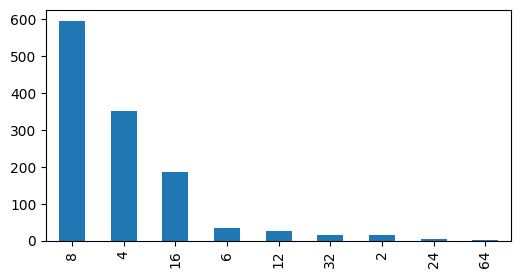

In [ ]:
df['Ram'].value_counts().plot(kind="bar")

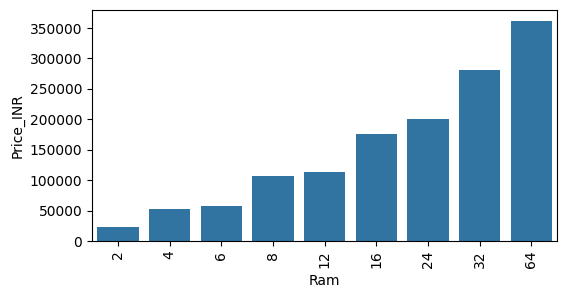

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price_INR'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_INR,X_res,Y_res,Touchscreen,IPS
1152,Dell,2 in 1 Convertible,15.6,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,2kg,116883,1920,1080,1,0


In [ ]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     124
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
AMD E-Series E2-9000 2.2GHz      1
Intel Core M M3-6Y30 0.9GHz      1
Intel Core i5 2.9GHz             1
Intel Atom x5-Z8350 1.44GHz      1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 111, dtype: int64

In [ ]:
a="Intel Core i5 8250U 1.6GHz"

In [ ]:
a.split()[-1:]

['1.6GHz']

In [ ]:
j=a.split()[0:3]+list(a.split()[-1])
j

['Intel', 'Core', 'i5', '1', '.', '6', 'G', 'H', 'z']

In [ ]:
(lambda a:" ".join(a.split()[0:3]+(a.split()[-1:])))("Intel Core i5 8250U 1.6GHz")

'Intel Core i5 1.6GHz'

In [ ]:
df['Cpu']=df['Cpu'].apply(lambda a:" ".join(a.split()[0:3]))

In [ ]:
df['Cpu'].value_counts()

Intel Core i7               493
Intel Core i5               411
Intel Core i3               134
Intel Celeron Dual           66
Intel Pentium Quad           27
Intel Core M                 16
AMD A9-Series 9420           12
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Celeron Quad            5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9600P          2
Intel Xeon E3-1535M           2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD E-Series 9000e            1
AMD Ryzen 1600                1
AMD E-Series 6110             1
AMD FX 9830P                  1
AMD E-Series E2-6110          1
AMD E-Series E2-9000          1
AMD A6-Series 7310            1
Intel Atom x5-Z8350           1
AMD A12-

In [ ]:
def fetch_processor_name(text):
  if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3' or text=='Intel Core M':
    return text
  elif text.split()[0]=='Intel':
    return " ".join(text.split()[0:2])
  else:
    return "AMD Processor"

In [ ]:
df['Cpu']=df['Cpu'].apply(fetch_processor_name)

In [ ]:
df['Cpu'].value_counts()

Intel Core i7    493
Intel Core i5    411
Intel Core i3    134
Intel Celeron     71
AMD Processor     60
Intel Pentium     30
Intel Core M      16
Intel Atom         5
Intel Xeon         4
Name: Cpu, dtype: int64

<Axes: >

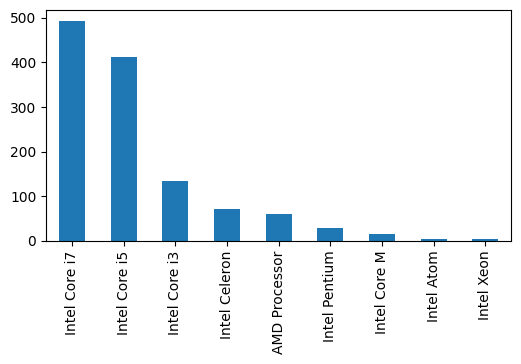

In [ ]:
df['Cpu'].value_counts().plot(kind='bar')

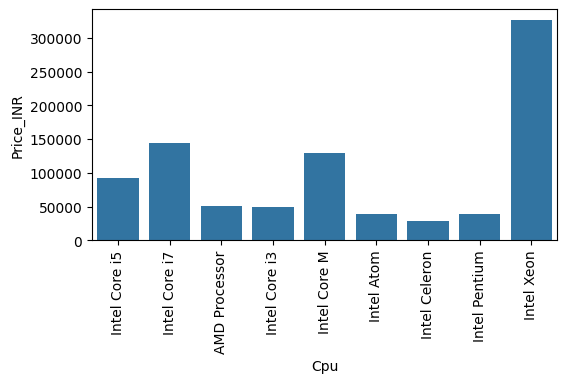

In [ ]:
sns.barplot(x=df['Cpu'],y=df['Price_INR'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# A complex coplum approch: Make seperate columns for HDD, SDD, Flash storage, Hybrid
# And there being 2 layer i.e. containing both SDD & HDD or SDD and Hybrid or Flash storage and HDD
df['Memory'].value_counts()

256GB SSD                        393
1TB HDD                          214
500GB HDD                        124
512GB SSD                        105
128GB SSD +  1TB HDD              93
256GB SSD +  1TB HDD              73
128GB SSD                         71
32GB Flash Storage                29
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           12
64GB Flash Storage                10
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
32GB SSD                           2
256GB SSD +  256GB SSD             2
512GB SSD +  512GB SSD             1
5

In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_INR,X_res,Y_res,Touchscreen,IPS
56,Asus,Notebook,15.6,Intel Core i5,4,Intel HD Graphics 620,Windows 10,2kg,53319,1366,768,0,0


In [ ]:
df['Gpu'].value_counts()

Intel HD Graphics 620      265
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     65
Nvidia GeForce GTX 1060     45
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: Gpu, Length: 108, dtype: int64

In [ ]:
df['Gpu']=df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df['Gpu'].value_counts()

Intel     666
Nvidia    385
AMD       173
Name: Gpu, dtype: int64

<Axes: >

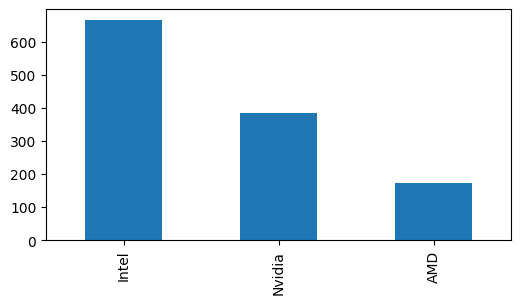

In [ ]:
df['Gpu'].value_counts().plot(kind='bar')

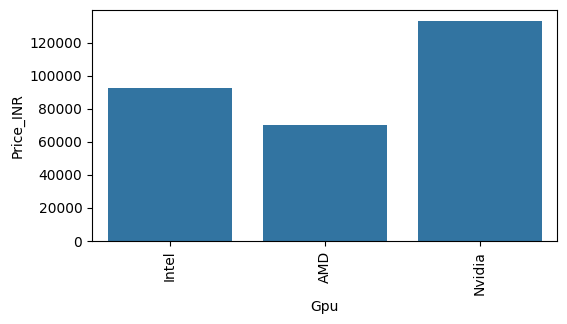

In [ ]:
sns.barplot(x=df['Gpu'],y=df['Price_INR'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['OpSys'].value_counts()

Windows 10      1011
No OS             63
Linux             58
Windows 7         45
Chrome OS         22
macOS             13
Mac OS X           8
Android            2
Windows 10 S       2
Name: OpSys, dtype: int64

In [ ]:
def fetch_os(text):
  if text=="Windows 10" or text=="Windows 10 S":
    return "Windows 10"
  elif text=="Windows 7":
    return text
  elif text=="Mac OS X" or text=="macOS":
    return "Mac OS"
  else:
    return "Linux/No OS/Others"

In [ ]:
df['OpSys'].apply(fetch_os)

0                   Mac OS
1                   Mac OS
2       Linux/No OS/Others
3                   Mac OS
4                   Mac OS
               ...        
1219            Windows 10
1220            Windows 10
1221            Windows 10
1222            Windows 10
1223            Windows 10
Name: OpSys, Length: 1224, dtype: object

In [ ]:
df['OpSys']=df['OpSys'].apply(fetch_os)

In [ ]:
df['OpSys'].value_counts()

Windows 10            1013
Linux/No OS/Others     145
Windows 7               45
Mac OS                  21
Name: OpSys, dtype: int64

<Axes: >

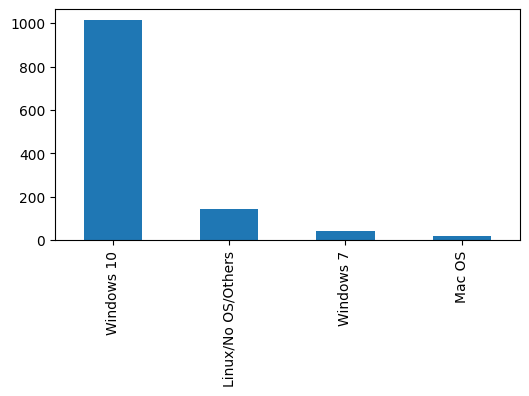

In [ ]:
df['OpSys'].value_counts().plot(kind='bar')

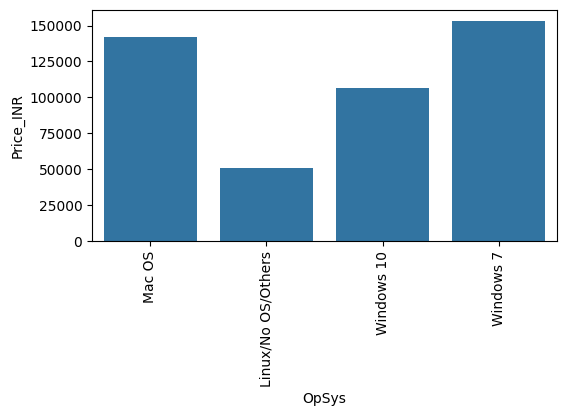

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price_INR'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Weight']

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1219     1.8kg
1220     1.3kg
1221     1.5kg
1222    2.19kg
1223     2.2kg
Name: Weight, Length: 1224, dtype: object

In [ ]:
df['Weight'].apply(lambda x:x.replace("kg","")).astype('float')

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1219    1.80
1220    1.30
1221    1.50
1222    2.19
1223    2.20
Name: Weight, Length: 1224, dtype: float64

In [ ]:
df['Weight_kg']=df['Weight'].apply(lambda x:x.replace("kg","")).astype('float')

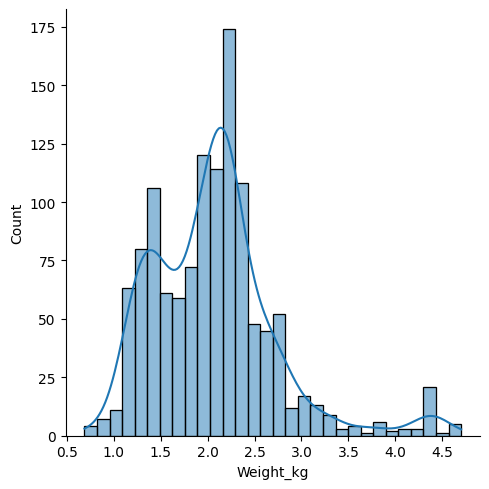

In [ ]:
sns.displot(x=df['Weight_kg'],kde=True)

<Axes: xlabel='Weight_kg', ylabel='Price_INR'>

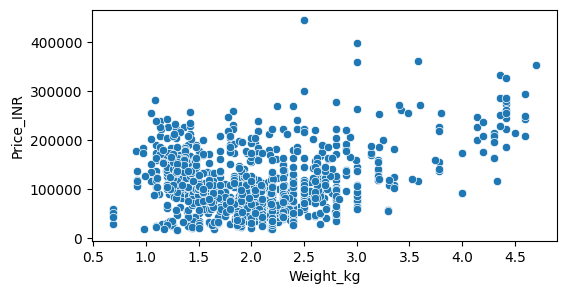

In [ ]:
sns.scatterplot(x=df['Weight_kg'],y=df['Price_INR'])

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_INR,X_res,Y_res,Touchscreen,IPS,Weight_kg
53,Acer,Notebook,15.6,Intel Core i3,4,Intel,Windows 10,2.4kg,34928,1366,768,0,0,2.4


In [ ]:
df.drop(columns=['Weight'],inplace=True)

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Price_INR,X_res,Y_res,Touchscreen,IPS,Weight_kg
578,MSI,Gaming,17.3,Intel Core i7,16,Nvidia,Windows 10,200021,1920,1080,0,0,4.14


In [ ]:
df.corr(numeric_only=True)['Price_INR']

Inches         0.055330
Ram            0.726639
Price_INR      1.000000
X_res          0.553707
Y_res          0.552964
Touchscreen    0.161443
IPS            0.289226
Weight_kg      0.212038
Name: Price_INR, dtype: float64

In [ ]:
# Pixel density(ppi) is a much better measure than X_res and Y_res

In [ ]:
df['ppi']=round(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('int')

In [ ]:
df['ppi']  #Pixel per inches

0       227
1       128
2       141
3       221
4       227
       ... 
1219    157
1220    276
1221    112
1222    100
1223    100
Name: ppi, Length: 1224, dtype: int64

In [ ]:
df.corr(numeric_only=True)['Price_INR']

Inches         0.055330
Ram            0.726639
Price_INR      1.000000
X_res          0.553707
Y_res          0.552964
Touchscreen    0.161443
IPS            0.289226
Weight_kg      0.212038
ppi            0.483821
Name: Price_INR, dtype: float64

In [ ]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Price_INR,Touchscreen,IPS,Weight_kg,ppi
979,HP,Ultrabook,Intel Core i5,4,Intel,Windows 10,141806,0,0,1.26,125


In [ ]:
df['ppi'].value_counts()

141    419
100    195
127    131
157    122
166    100
112     42
135     28
176     25
276     25
282     23
106     22
210     18
125      9
118      8
331      7
227      6
226      6
221      6
255      5
128      4
224      4
158      4
317      2
170      2
91       2
352      2
190      1
108      1
120      1
111      1
195      1
235      1
147      1
Name: ppi, dtype: int64

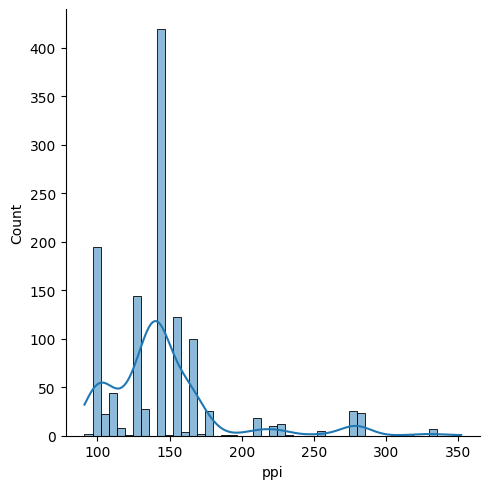

In [ ]:
sns.displot(x=df['ppi'],kde=True)

<Axes: xlabel='ppi', ylabel='Price_INR'>

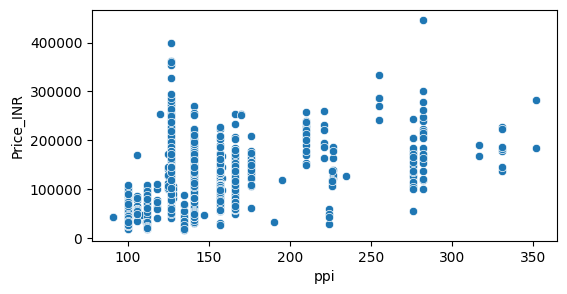

In [ ]:
sns.scatterplot(x=df['ppi'],y=df['Price_INR'])

In [ ]:
df.shape

(1224, 11)

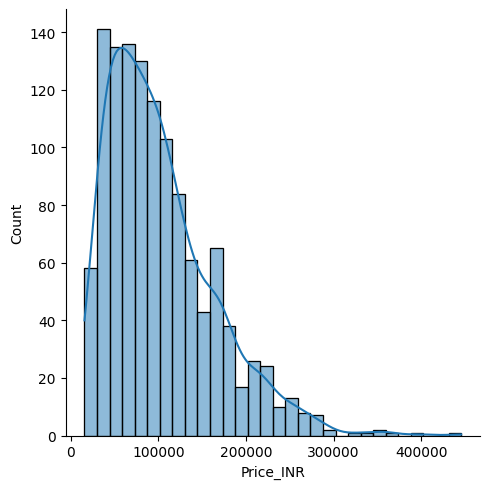

In [ ]:
sns.displot(x=df['Price_INR'],kde=True)
plt.show()

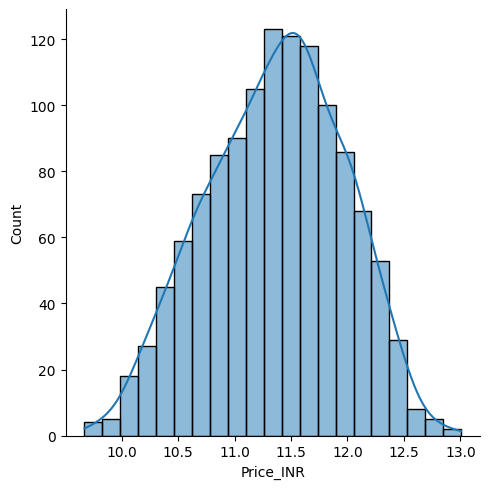

In [ ]:
sns.displot(x=np.log(df['Price_INR']),kde=True)
plt.show()

In [ ]:
X=df.drop(columns=['Price_INR'])
Y=np.log(df['Price_INR'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.15, random_state=42)

In [ ]:
X.shape

(1224, 10)

In [ ]:
X_train.shape

(1040, 10)

In [ ]:
X_test.shape

(184, 10)

In [ ]:
X.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Touchscreen,IPS,Weight_kg,ppi
0,Apple,Ultrabook,Intel Core i5,8,Intel,Mac OS,0,1,1.37,227
1,Apple,Ultrabook,Intel Core i5,8,Intel,Mac OS,0,0,1.34,128
2,HP,Notebook,Intel Core i5,8,Intel,Linux/No OS/Others,0,0,1.86,141
3,Apple,Ultrabook,Intel Core i7,16,AMD,Mac OS,0,1,1.83,221
4,Apple,Ultrabook,Intel Core i5,8,Intel,Mac OS,0,1,1.37,227


In [ ]:
round(1224*0.85,2)

1040.4

In [ ]:
X_train.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Touchscreen,IPS,Weight_kg,ppi
240,Apple,Ultrabook,Intel Core i5,8,Intel,Mac OS,0,1,1.37,227
439,Lenovo,Notebook,Intel Core i5,8,Intel,Windows 10,0,0,1.65,157
192,Dell,Gaming,Intel Core i7,16,Nvidia,Windows 10,0,1,2.65,282
218,Asus,Notebook,Intel Core i5,8,Nvidia,Windows 10,0,0,2.00,141
184,Dell,Notebook,Intel Core i7,8,AMD,Windows 10,0,0,2.80,127


In [ ]:
Y_train.head()

240    12.131123
439    11.714568
192    12.030653
218    11.155507
184    11.499749
Name: Price_INR, dtype: float64

In [ ]:
X_test.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Touchscreen,IPS,Weight_kg,ppi
661,Lenovo,Notebook,Intel Core i5,4,Intel,Windows 10,0,0,1.70,157
220,HP,Notebook,Intel Core i7,8,AMD,Windows 10,0,0,1.90,141
155,Dell,2 in 1 Convertible,Intel Core i7,8,Intel,Windows 10,1,0,1.56,141
677,Lenovo,Workstation,Intel Core i7,16,Nvidia,Windows 7,0,0,2.18,141
911,Dell,2 in 1 Convertible,Intel Core i5,8,Intel,Windows 10,1,0,1.24,166


In [ ]:
Y_test.head()

661    11.060070
220    11.656402
155    11.466012
677    12.036055
911    12.059502
Name: Price_INR, dtype: float64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# Regression model algorithm chosse regression or clasification
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
X_train.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Touchscreen,IPS,Weight_kg,ppi
633,Lenovo,Notebook,Intel Celeron,4,Intel,Windows 10,0,0,2.2,100


In [ ]:
# LinearRegression

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))

R2 score: 0.784985482870678
MAE: 0.20009186638712764
MSE: 0.06789066706487663


In [ ]:
# Lasso

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=Lasso(alpha=0.001)  #Hyperparameters
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))

R2 score: 0.7924896878376002
MAE: 0.19507779395742855
MSE: 0.06552122016520757


In [ ]:
# Ridge

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=Ridge(alpha=8)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))

R2 score: 0.791147889967475
MAE: 0.19647484813345853
MSE: 0.06594489180229172


In [ ]:
# KNeighborsRegressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))

R2 score: 0.7859697023952642
MAE: 0.1926773629893376
MSE: 0.06757990051313613


In [ ]:
# DecisionTreeRegressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))

R2 score: 0.8071672424226194
MAE: 0.18527125468627048
MSE: 0.060886793685721294


In [ ]:
# Support Vector Regressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=SVR(C=10000)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))

R2 score: 0.8071672424226194
MAE: 0.18527125468627048
MSE: 0.060886793685721294


In [ ]:
# AdaBoostRegressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=AdaBoostRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))

R2 score: 0.8071672424226194
MAE: 0.18527125468627048
MSE: 0.060886793685721294


In [ ]:
# RandomForestRegressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=RandomForestRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))

R2 score: 0.8071672424226194
MAE: 0.18527125468627048
MSE: 0.060886793685721294


In [ ]:
# eXtreme Gradient Boosting Regressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=XGBRegressor(n_estimators=50,max_depth=4)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))

R2 score: 0.8071672424226194
MAE: 0.18527125468627048
MSE: 0.060886793685721294


In [ ]:
# GradientBoostingRegressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=GradientBoostingRegressor(n_estimators=300)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))

R2 score: 0.8071672424226194
MAE: 0.18527125468627048
MSE: 0.060886793685721294


In [ ]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
! pip install streamlit --quiet

In [ ]:
import joblib

In [ ]:
joblib.dump(step2,"lr_model")

['lr_model']

In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np
import joblib

df=pickle.load(open('df.pkl','rb'))
pipe=pickle.load(open('pipe.pkl','rb'))
model=joblib.load("lr_model")


st.title("Laptop Price Predictor")

company=st.selectbox("Brand",df['Company'].unique(),index=4)
type=st.selectbox("Type",df['TypeName'].unique(),index=1)
cpu=st.selectbox("Processor",df['Cpu'].unique(),index=0)
ram=st.selectbox("RAM(in GB)",[2,4,6,8,12,16,24,32,64,128],index=3)
gpu=st.selectbox("GPU",df['Gpu'].unique(),index=0)

Price_INRinput_data = [[company, type, cpu, ram, gpu]]
prediction = model.predict(Price_INRinput_data)



if st.button('PREDICT'):
  sal=model.predict([[Price_INRinput_data]])
  st.subheader("The Laptop Price is : Rs "+ st.write(f"Predicted Class: {sal[0]}"))


Overwriting app.py


In [ ]:
X_train.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Touchscreen,IPS,Weight_kg,ppi
729,Dell,Ultrabook,Intel Core i7,16,Intel,Windows 10,0,0,1.18,176


In [ ]:
df['Cpu'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Intel Core M', 'Intel Atom', 'Intel Celeron', 'Intel Pentium',
       'Intel Xeon'], dtype=object)

In [ ]:
df['Gpu'].unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] - fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.134.190:8501

npx: installed 22 in 3.792s
your url is: https://thirty-shoes-act.loca.lt
2024-03-05 17:49:20.679 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 535, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 20, in <module>
    prediction = model.predict(Price_INRinput_data)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 1798, in predict
    X = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 565, in _validate_data
    X = check_array(X, input_name="X", **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in chec